In [15]:
# imports
from dotenv import load_dotenv
import os

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import openai
from openai.embeddings_utils import plot_multiclass_precision_recall

In [16]:
# set OpenAI API key
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

In [17]:
# load data
datafile_path = "../data/fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to array
df

,Id,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
0,284932,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007079250644892454, -0.027231059968471527, ..."
1,220697,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,35,"[-0.023640209808945656, -0.011873619630932808,..."
2,107908,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....",267,"[0.0002428288134979084, 0.005278090480715036, ..."
3,107800,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...,239,"[0.010502707213163376, -0.013550193049013615, ..."
4,205313,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,86,"[0.015294435434043407, -0.003849664004519582, ..."
...,...,...,...,...,...,...,...,...,...
995,7178,B004OQLIHK,AKHQMSUORSA91,5,Delicious!,I have ordered these raisins multiple times. ...,Title: Delicious!; Content: I have ordered the...,43,"[-0.008800246752798557, -0.018662363290786743,..."
996,401972,B0006349W6,A21BT40VZCCYT4,5,Good Training Treat,My dog will come in from outside when I am tra...,Title: Good Training Treat; Content: My dog wi...,48,"[-0.024472814053297043, -0.0175948329269886, 0..."
997,462088,B00611F084,A6D4ND3C3BCYV,5,Jamica Me Crazy Coffee,Wolfgang Puck's Jamaica Me Crazy is that wonde...,Title: Jamica Me Crazy Coffee; Content: Wolfga...,40,"[-0.01685294136404991, -0.0051534585654735565,..."
998,267549,B005QKH5HA,A3LR9HCV3D96I3,5,Party Peanuts,Great product for the price. Mix with the Asia...,Title: Party Peanuts; Content: Great product f...,45,"[-0.010731690563261509, -0.01646377146244049, ..."


In [20]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)
# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

In [23]:
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           1       0.88      0.39      0.54        18
           2       1.00      0.35      0.52        17
           3       1.00      0.12      0.22         8
           4       1.00      0.35      0.51        26
           5       0.74      1.00      0.85       131

    accuracy                           0.77       200
   macro avg       0.92      0.44      0.53       200
weighted avg       0.82      0.77      0.73       200



RandomForestClassifier() - Average precision score over all classes: 0.89


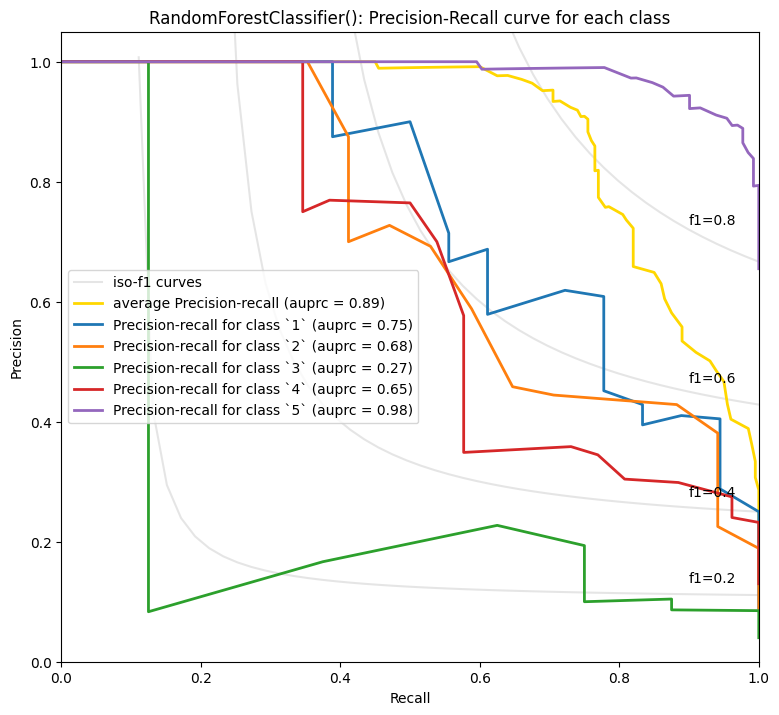

In [24]:
from openai.embeddings_utils import plot_multiclass_precision_recall
plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)